# LAb_05
## Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)


In [2]:
data = pd.read_csv('tripadvisor_european_restaurants(preprocessed).csv')

In [3]:
data

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,0,1354,235,0,9,36,255,168,987,766,...,2,0,0,0,0,5,6,5,9,24
1,1,1815,235,0,9,36,255,564,986,781,...,2,2,1,0,0,8,8,8,9,24
2,2,82,96,0,3,10,223,836,1052,848,...,3,1,0,0,0,8,8,8,9,24
3,3,1778,217,0,9,15,113,2163,922,984,...,1,0,0,0,0,6,6,6,9,24
4,4,2369,257,0,10,7,256,2837,442,1928,...,4,7,0,0,0,6,6,6,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,1710,273,0,10,40,296,936,158,2115,...,6,2,0,0,2,3,4,3,4,24
2996,2996,1453,273,0,10,40,296,786,146,2129,...,21,15,6,3,13,4,4,3,9,24
2997,2997,1550,273,0,10,40,296,972,145,2112,...,1,0,0,0,0,8,8,8,9,24
2998,2998,1466,273,0,10,40,296,1347,140,2104,...,2,2,0,0,0,5,6,5,8,24


In [4]:
data.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

### Checking correlation to drop the unnecessary columns.

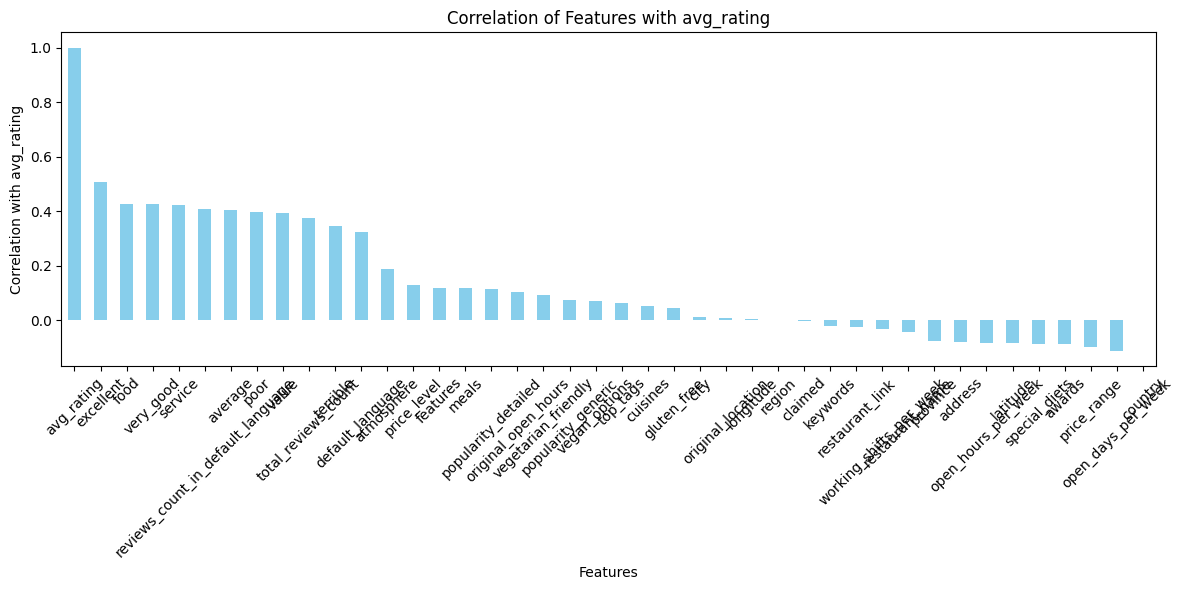

In [5]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Sort the features by their correlation with the target column
correlation_with_target = correlation_matrix['avg_rating'].sort_values(ascending=False)

# Plot the correlation on a sorted bar graph
plt.figure(figsize=(12, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with avg_rating')
plt.title('Correlation of Features with avg_rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
data  = data.drop(columns='country')

In [7]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

column_names = data.columns
scaled_df = pd.DataFrame(scaled_data, columns=column_names)

In [8]:
scaled_df

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,-1.731474,-0.041935,0.775851,0.687526,-0.409071,1.094634,-1.526867,-0.548842,-0.821066,-1.014778,...,-0.443739,-0.505628,-0.413241,-0.375546,-0.394136,-0.648382,-0.072177,-0.566582,0.575012,0.078487
1,-1.730319,0.530811,0.775851,0.687526,-0.409071,1.094634,-1.045188,-0.550052,-0.803110,0.982816,...,-0.443739,-0.383580,-0.305533,-0.375546,-0.394136,1.113526,1.117552,1.139418,0.575012,0.078487
2,-1.729164,-1.622268,-0.940733,-1.055989,-1.522889,0.748683,-0.714338,-0.470228,-0.722904,-1.014778,...,-0.401273,-0.444604,-0.413241,-0.375546,-0.394136,1.113526,1.117552,1.139418,0.575012,0.078487
3,-1.728009,0.484842,0.553559,0.687526,-1.308694,-0.440526,0.899772,-0.627457,-0.560097,-1.014778,...,-0.486204,-0.505628,-0.413241,-0.375546,-0.394136,-0.061079,-0.072177,0.002085,0.575012,0.078487
4,-1.726855,1.219101,1.047540,0.978112,-1.651407,1.105445,1.719599,-1.207995,0.569972,0.982816,...,-0.358807,-0.078457,-0.413241,-0.375546,-0.394136,-0.061079,-0.072177,0.002085,0.575012,0.078487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1.726855,0.400359,1.245132,0.978112,-0.237715,1.537885,-0.592702,-1.551480,0.793831,0.982816,...,-0.273876,-0.383580,-0.413241,-0.375546,-0.137481,-1.822988,-1.261906,-1.703915,-2.483564,0.078487
2996,1.728009,0.081062,1.245132,0.978112,-0.237715,1.537885,-0.775156,-1.565994,0.810590,-1.014778,...,0.363110,0.409739,0.233009,0.013129,1.274119,-1.235685,-1.261906,-1.703915,0.575012,0.078487
2997,1.729164,0.201575,1.245132,0.978112,-0.237715,1.537885,-0.548913,-1.567203,0.790239,-1.014778,...,-0.486204,-0.505628,-0.413241,-0.375546,-0.394136,1.113526,1.117552,1.139418,0.575012,0.078487
2998,1.730319,0.097214,1.245132,0.978112,-0.237715,1.537885,-0.092778,-1.573251,0.780662,-1.014778,...,-0.443739,-0.383580,-0.413241,-0.375546,-0.394136,-0.648382,-0.072177,-0.566582,-0.036703,0.078487


## K_means

In [9]:
# ONLY FOR KMEAN
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_data)

d:\ML lab\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
labels 

array([0, 0, 0, ..., 0, 0, 0])

### Applying various evaluation metrics to check performance of K_means

In [11]:
silhouette = silhouette_score(scaled_data, labels)
calinski_harabasz = calinski_harabasz_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)
normalized_mutual_info = normalized_mutual_info_score(data['avg_rating'].values, labels)
adjusted_rand = adjusted_rand_score(data['avg_rating'].values, labels)
adjusted_mutual_info = adjusted_mutual_info_score(data['avg_rating'].values, labels)
v_measure = v_measure_score(data['avg_rating'].values, labels)
completeness = completeness_score(data['avg_rating'].values, labels)
homogeneity = homogeneity_score(data['avg_rating'].values, labels)


print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Normalized Mutual Info: {normalized_mutual_info:.4f}")
print(f"Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Adjusted Mutual Info: {adjusted_mutual_info:.4f}")
print(f"V-Measure: {v_measure:.4f}")
print(f"Completeness Score: {completeness:.4f}")
print(f"Homogeneity Score: {homogeneity:.4f}")


Silhouette Score: 0.3645
Calinski-Harabasz Score: 603.3010
Davies-Bouldin Score: 0.9631
Normalized Mutual Info: 0.2296
Adjusted Rand Index: 0.0703
Adjusted Mutual Info: 0.2284
V-Measure: 0.2296
Completeness Score: 0.9423
Homogeneity Score: 0.1307


### Introducing some more models and then checking their performance and later visualizing clusters of each of the model on scatter plot w.r.t. PCA and tsne.

Model: KMeans


d:\ML lab\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3645
Calinski-Harabasz Score: 603.3010
Davies-Bouldin Score: 0.9631
Normalized Mutual Info: 0.2296
Adjusted Rand Index: 0.0703
Adjusted Mutual Info: 0.2284
V-Measure: 0.2296
Completeness Score: 0.9423
Homogeneity Score: 0.1307


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

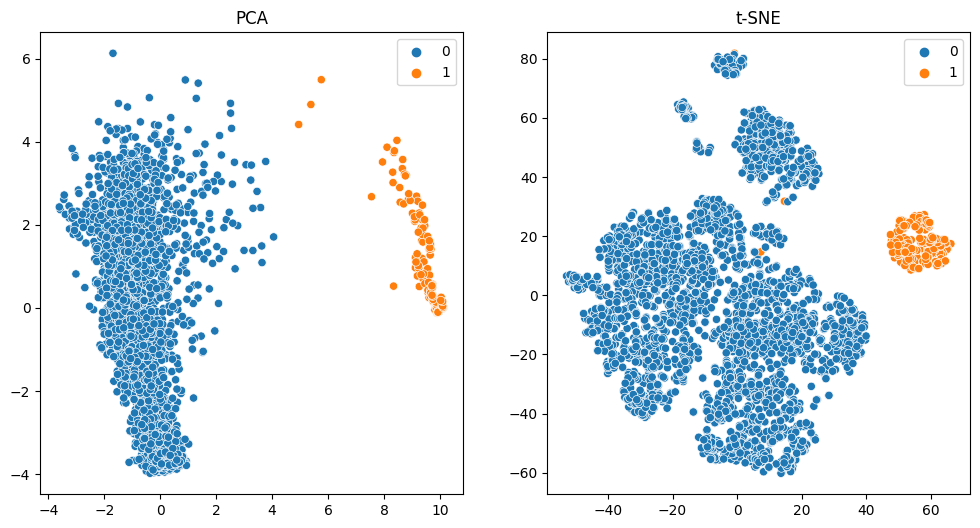


Model: KMeans


d:\ML lab\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.1250
Calinski-Harabasz Score: 494.4485
Davies-Bouldin Score: 2.2201
Normalized Mutual Info: 0.1936
Adjusted Rand Index: 0.0759
Adjusted Mutual Info: 0.1918
V-Measure: 0.1936
Completeness Score: 0.2935
Homogeneity Score: 0.1445


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

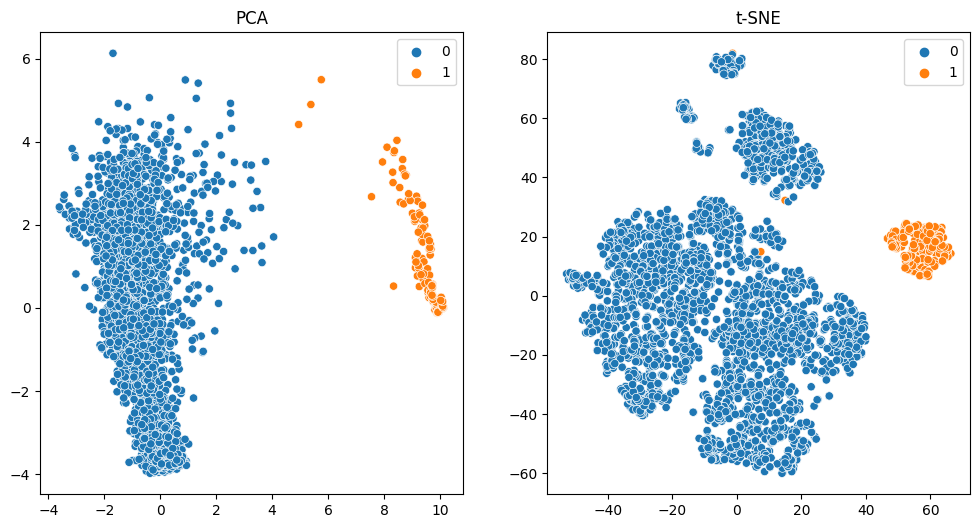


Model: AgglomerativeClustering
Silhouette Score: 0.3647
Calinski-Harabasz Score: 600.7895
Davies-Bouldin Score: 0.9510
Normalized Mutual Info: 0.2338
Adjusted Rand Index: 0.0708
Adjusted Mutual Info: 0.2326
V-Measure: 0.2338
Completeness Score: 0.9683
Homogeneity Score: 0.1330


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

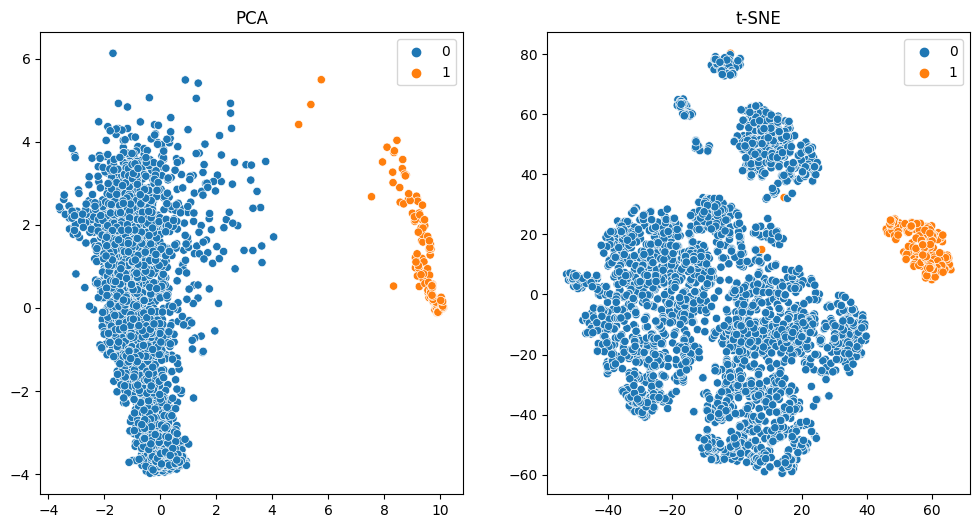


Model: AgglomerativeClustering
Silhouette Score: 0.1114
Calinski-Harabasz Score: 465.7943
Davies-Bouldin Score: 2.3462
Normalized Mutual Info: 0.1872
Adjusted Rand Index: 0.0797
Adjusted Mutual Info: 0.1853
V-Measure: 0.1872
Completeness Score: 0.2856
Homogeneity Score: 0.1392


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

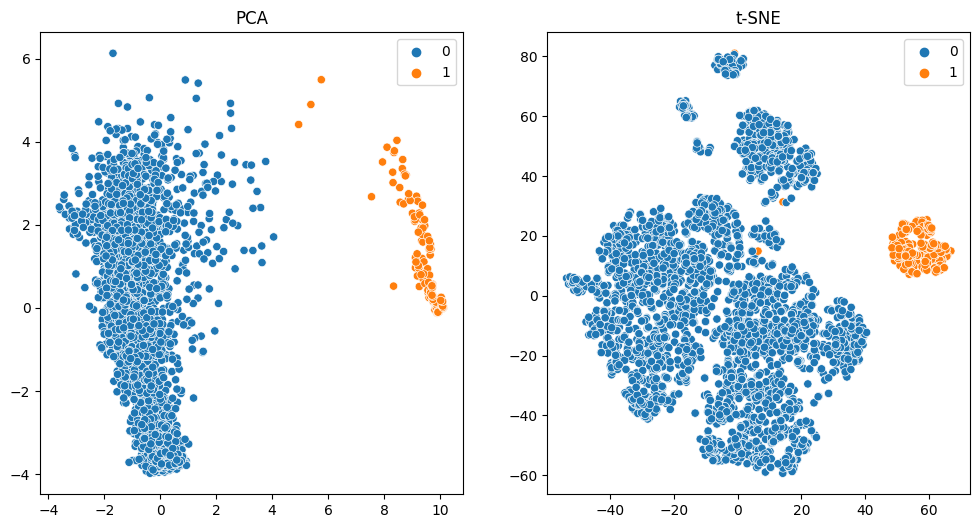


Model: MeanShift
Silhouette Score: 0.3693
Calinski-Harabasz Score: 143.3301
Davies-Bouldin Score: 0.9285
Normalized Mutual Info: 0.2254
Adjusted Rand Index: 0.0661
Adjusted Mutual Info: 0.2208
V-Measure: 0.2254
Completeness Score: 0.6969
Homogeneity Score: 0.1345


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

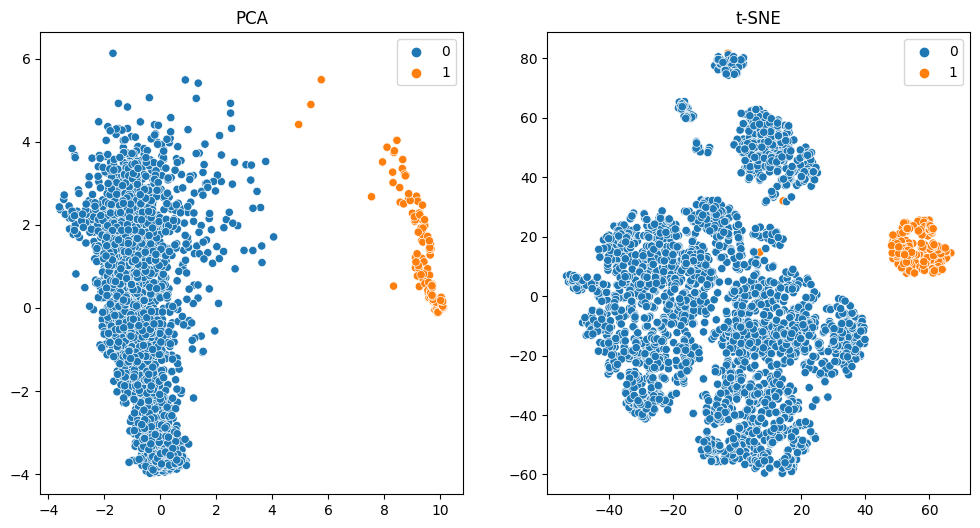


Model: GaussianMixture
Silhouette Score: 0.0844
Calinski-Harabasz Score: 257.1467
Davies-Bouldin Score: 3.2466
Normalized Mutual Info: 0.0756
Adjusted Rand Index: 0.0542
Adjusted Mutual Info: 0.0745
V-Measure: 0.0756
Completeness Score: 0.1386
Homogeneity Score: 0.0520


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

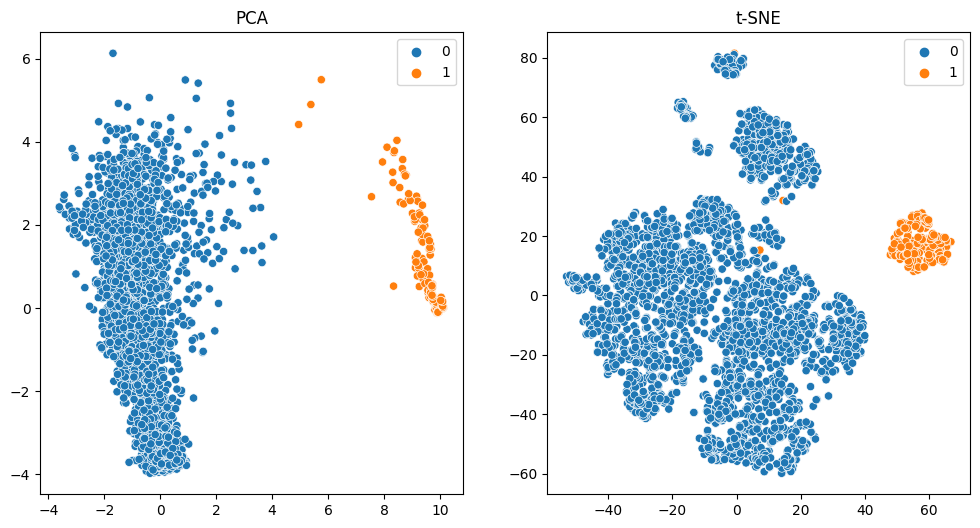


Model: GaussianMixture
Silhouette Score: 0.1829
Calinski-Harabasz Score: 432.9525
Davies-Bouldin Score: 2.3113
Normalized Mutual Info: 0.2063
Adjusted Rand Index: 0.0422
Adjusted Mutual Info: 0.2043
V-Measure: 0.2063
Completeness Score: 0.3668
Homogeneity Score: 0.1435


d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

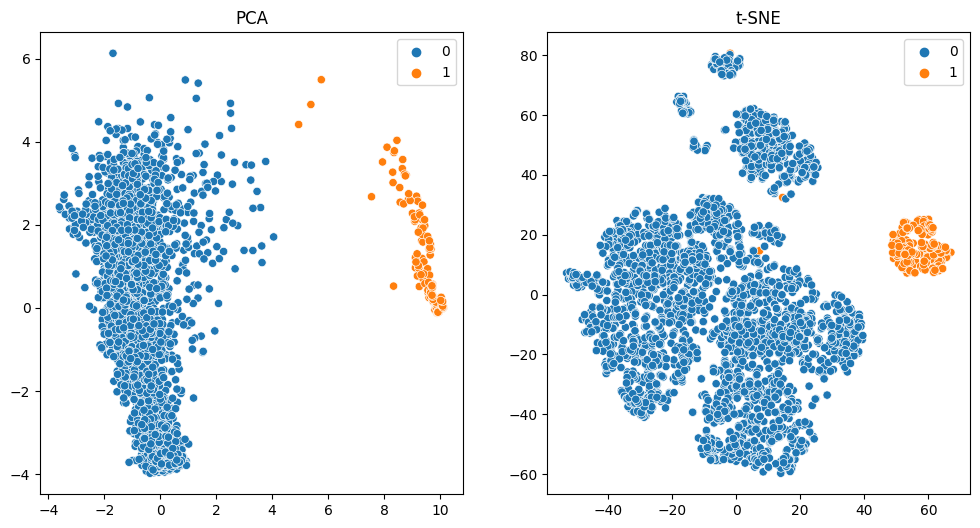

In [12]:
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score,
    normalized_mutual_info_score, adjusted_rand_score,
    adjusted_mutual_info_score, v_measure_score,
    completeness_score, homogeneity_score
)

# Define a function to evaluate clustering metrics for a given model
def evaluate_clustering_metrics(model, data, scaled_data):
    labels = model.fit_predict(scaled_data)
    evaluation_metricsx = {
        'Silhouette Score': silhouette_score(scaled_data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(scaled_data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(scaled_data, labels),
        'Normalized Mutual Info': normalized_mutual_info_score(data['avg_rating'].values, labels),
        'Adjusted Rand Index': adjusted_rand_score(data['avg_rating'].values, labels),
        'Adjusted Mutual Info': adjusted_mutual_info_score(data['avg_rating'].values, labels),
        'V-Measure': v_measure_score(data['avg_rating'].values, labels),
        'Completeness Score': completeness_score(data['avg_rating'].values, labels),
        'Homogeneity Score': homogeneity_score(data['avg_rating'].values, labels),
    }
    return evaluation_metricsx

# Initialize a list to store clustering models
clustering_models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    AgglomerativeClustering(n_clusters=2),
    AgglomerativeClustering(n_clusters=3),
    MeanShift(),
    GaussianMixture(n_components=2),  # Add Gaussian Mixture Model with 2 components
    GaussianMixture(n_components=3)
]

lx =[]
# Loop through all clustering models and evaluate metrics
for model in clustering_models:
    d = []
    print(f"Model: {model.__class__.__name__}")
    metrics = evaluate_clustering_metrics(model, data, scaled_data)
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.4f}")
        d.append(score)
    lx.append(d)
    
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2)

    pca_result = pca.fit_transform(scaled_data)
    tsne_result = tsne.fit_transform(scaled_data)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    # plt.scatter(pca_result[:, 0], pca_result[:, 1])
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],hue=labels)
    plt.title("PCA")

    plt.subplot(1, 2, 2)
    # plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],hue=labels)
    plt.title("t-SNE")
    plt.savefig(f"{model}.pdf",dpi=300,format="pdf")
    plt.show()
    
    print()
    

In [13]:
df_res = pd.DataFrame(lx,index=clustering_models,columns= metrics.keys())

In [14]:
df_res

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Normalized Mutual Info,Adjusted Rand Index,Adjusted Mutual Info,V-Measure,Completeness Score,Homogeneity Score
KMeans(n_clusters=2),0.364528,603.300986,0.963067,0.229628,0.070302,0.228443,0.229628,0.942270,0.130745
KMeans(n_clusters=3),0.124965,494.448518,2.220143,0.193649,0.075930,0.191793,0.193649,0.293511,0.144489
AgglomerativeClustering(),0.364667,600.789482,0.951010,0.233822,0.070764,0.232642,0.233822,0.968329,0.132964
AgglomerativeClustering(n_clusters=3),0.111355,465.794338,2.346250,0.187192,0.079684,0.185315,0.187192,0.285639,0.139212
MeanShift(),0.369336,143.330084,0.928483,0.225416,0.066085,0.220753,0.225416,0.696872,0.134454
GaussianMixture(n_components=2),0.084442,257.146654,3.246624,0.075599,0.054206,0.074471,0.075599,0.138576,0.051978
GaussianMixture(n_components=3),0.182891,432.952512,2.311283,0.206251,0.042225,0.204276,0.206251,0.366763,0.143465
